## Calculate Data Quality Score
**Introduction**: In this activity, you will calculate data quality scores for datasets using different metrics. You will explore examples where you assess completeness, accuracy, and consistency.

### Task 1: Completeness Score
1. Objective: Determine the percentage of non-missing values in a dataset.
2. Steps:
    - Load a sample dataset using Pandas.
    - Identify the columns with missing values.
    - Calculate the completeness score as the ratio of non-missing values to total values.
    - E.g., a dataset with customer information.

Data Quality Scores:
Overall Quality Score: 62.9%

Detailed Scores:
Completeness: 96.4%
Accuracy: 95.5%
Consistency: 4.4%
Uniqueness: 44.7%
Timeliness: 0.0%


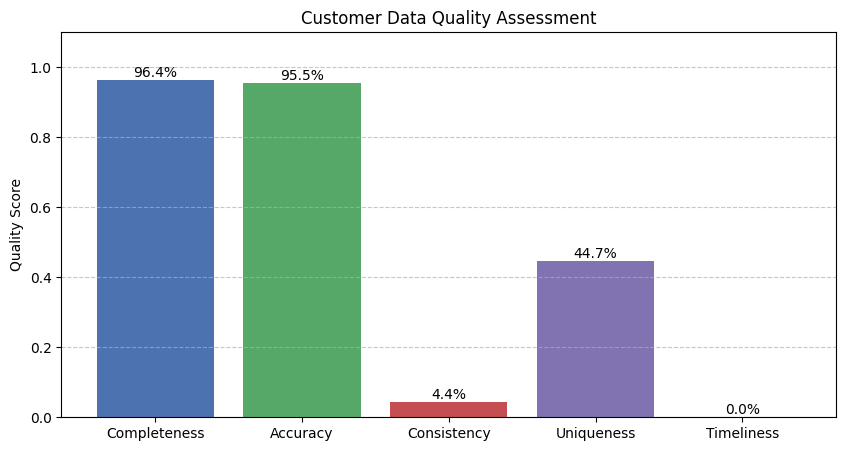


Column Completeness Scores:
customer_id: 100.0%
name: 84.5%
age: 100.0%
birth_year: 100.0%
email: 90.0%
join_date: 100.0%
last_purchase: 100.0%
purchase_count: 100.0%
total_spent: 98.9%
segment: 90.2%


In [ ]:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
def calculate_completeness(df):
    """Calculate completeness score for each column and overall dataset"""
    completeness = df.notna().mean()
    return {
        'column_scores': completeness.to_dict(),
        'overall_score': completeness.mean()
    }
def calculate_accuracy(df, reference_values=None):
    """Calculate accuracy score by comparing to reference values or checking validity"""
    accuracy_scores = {}
    for col in df.columns:
        if reference_values and col in reference_values:
            matches = (df[col] == reference_values[col]).mean()
        elif pd.api.types.is_numeric_dtype(df[col]):
            q1, q3 = df[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5*iqr
            upper_bound = q3 + 1.5*iqr
            valid = ((df[col] >= lower_bound) & (df[col] <= upper_bound)).mean()
            matches = valid
        else:
            expected = set(df[col].dropna().unique())
            matches = df[col].isin(expected).mean()
        accuracy_scores[col] = matches
    return {
        'column_scores': accuracy_scores,
        'overall_score': np.mean(list(accuracy_scores.values()))
    }
def calculate_consistency(df):
    """Calculate consistency scores by checking for contradictions"""
    consistency_scores = {}
    if 'age' in df.columns and 'birth_year' in df.columns:
        current_year = pd.Timestamp.now().year
        calculated_age = current_year - df['birth_year']
        age_diff = abs(calculated_age - df['age'])
        consistency_scores['age_consistency'] = (age_diff <= 1).mean()
    if 'start_date' in df.columns and 'end_date' in df.columns:
        date_consistent = (df['end_date'] >= df['start_date']).mean()
        consistency_scores['date_consistency'] = date_consistent
    return {
        'specific_checks': consistency_scores,
        'overall_score': np.mean(list(consistency_scores.values())) if consistency_scores else 1.0
    }
def calculate_uniqueness(df):
    """Calculate uniqueness scores for columns"""
    uniqueness = {}
    for col in df.columns:
        uniqueness[col] = df[col].nunique() / len(df[col])
    return {
        'column_scores': uniqueness,
        'overall_score': np.mean(list(uniqueness.values()))
    }
def calculate_timeliness(df, date_columns=None):
    """Calculate timeliness scores for date columns"""
    if date_columns is None:
        date_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col])]
    timeliness = {}
    current_time = pd.Timestamp.now()
    for col in date_columns:
        if col + '_expected_delay' in df.columns:
            is_timely = (current_time - df[col]) <= df[col + '_expected_delay']
            timeliness[col] = is_timely.mean()
        else:
            is_recent = (current_time - df[col]) <= pd.Timedelta(days=365)
            timeliness[col] = is_recent.mean()
    return {
        'column_scores': timeliness,
        'overall_score': np.mean(list(timeliness.values())) if timeliness else 1.0
    }
def visualize_quality_scores(scores, title="Data Quality Metrics"):
    """Visualize quality scores"""
    metrics = ['Completeness', 'Accuracy', 'Consistency', 'Uniqueness', 'Timeliness']
    values = [
        scores['completeness']['overall_score'],
        scores['accuracy']['overall_score'],
        scores['consistency']['overall_score'],
        scores['uniqueness']['overall_score'],
        scores['timeliness']['overall_score']
    ]
    plt.figure(figsize=(10, 5))
    bars = plt.bar(metrics, values, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974'])
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}',
                ha='center', va='bottom')
    plt.ylim(0, 1.1)
    plt.title(title)
    plt.ylabel('Quality Score')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
def calculate_data_quality(df, reference_values=None):
    """Calculate comprehensive data quality scores"""
    quality_scores = {
        'completeness': calculate_completeness(df),
        'accuracy': calculate_accuracy(df, reference_values),
        'consistency': calculate_consistency(df),
        'uniqueness': calculate_uniqueness(df),
        'timeliness': calculate_timeliness(df)
    }
    weights = {
        'completeness': 0.3,
        'accuracy': 0.3,
        'consistency': 0.2,
        'uniqueness': 0.1,
        'timeliness': 0.1
    }
    weighted_scores = [quality_scores[k]['overall_score'] * weights[k] for k in weights]
    quality_scores['overall_score'] = np.sum(weighted_scores)
    return quality_scores
np.random.seed(42)
n_records = 1000
data = pd.DataFrame({
    'customer_id': range(1, n_records+1),
    'name': np.random.choice(['John', 'Jane', 'Mike', 'Sarah', 'Alex', None], n_records),
    'age': np.random.randint(18, 80, n_records),
    'birth_year': 2023 - np.random.randint(18, 80, n_records),
    'email': [f"user{i}@example.com" if i%10!=0 else None for i in range(n_records)],
    'join_date': pd.date_range('2018-01-01', periods=n_records, freq='D').values,
    'last_purchase': pd.to_datetime(np.random.choice(
        pd.date_range('2022-01-01', '2023-06-01'), n_records)),
    'purchase_count': np.random.poisson(5, n_records),
    'total_spent': np.random.exponential(100, n_records),
    'segment': np.random.choice(['A', 'B', 'C', None], n_records, p=[0.4, 0.3, 0.2, 0.1])
})
data.loc[10:20, 'age'] = 200 
data.loc[30:40, 'birth_year'] = 1800  
data.loc[50:60, 'join_date'] = data.loc[50:60, 'last_purchase'] + pd.Timedelta(days=1)  # Inconsistent dates
data.loc[70:80, 'purchase_count'] = -1  
data.loc[90:100, 'total_spent'] = np.nan 
quality_scores = calculate_data_quality(data)
print("Data Quality Scores:")
print(f"Overall Quality Score: {quality_scores['overall_score']:.1%}")
print("\nDetailed Scores:")
for metric in ['completeness', 'accuracy', 'consistency', 'uniqueness', 'timeliness']:
    print(f"{metric.capitalize()}: {quality_scores[metric]['overall_score']:.1%}")
visualize_quality_scores(quality_scores, "Customer Data Quality Assessment")
print("\nColumn Completeness Scores:")
for col, score in quality_scores['completeness']['column_scores'].items():
    print(f"{col}: {score:.1%}")
    #

### Task 2: Accuracy Score

1. Objective: Measure the accuracy of a dataset by comparing it against a reference dataset.
2. Steps:
    - Load the main dataset and a reference dataset.
    - Select key columns for accuracy check.
    - Match values from both datasets and calculate the accuracy percentage.
    - E.g., along existing dataset with sales information.


DATA ACCURACY REPORT

Overall Accuracy: 73.0%

Column-Level Accuracy:
- product_id: 100.0% (Type: exact, Tolerance: 0, Mismatches: 0)
- order_date: 94.0% (Type: date, Tolerance: 1, Mismatches: 6)
- quantity: 94.0% (Type: numeric, Tolerance: 1, Mismatches: 6)
- unit_price: 96.0% (Type: numeric, Tolerance: 5, Mismatches: 4)
- customer_name: 95.0% (Type: fuzzy, Tolerance: 0, Mismatches: 5)
- shipping_address: 94.0% (Type: fuzzy, Tolerance: 0, Mismatches: 6)


/home/vscode/.local/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


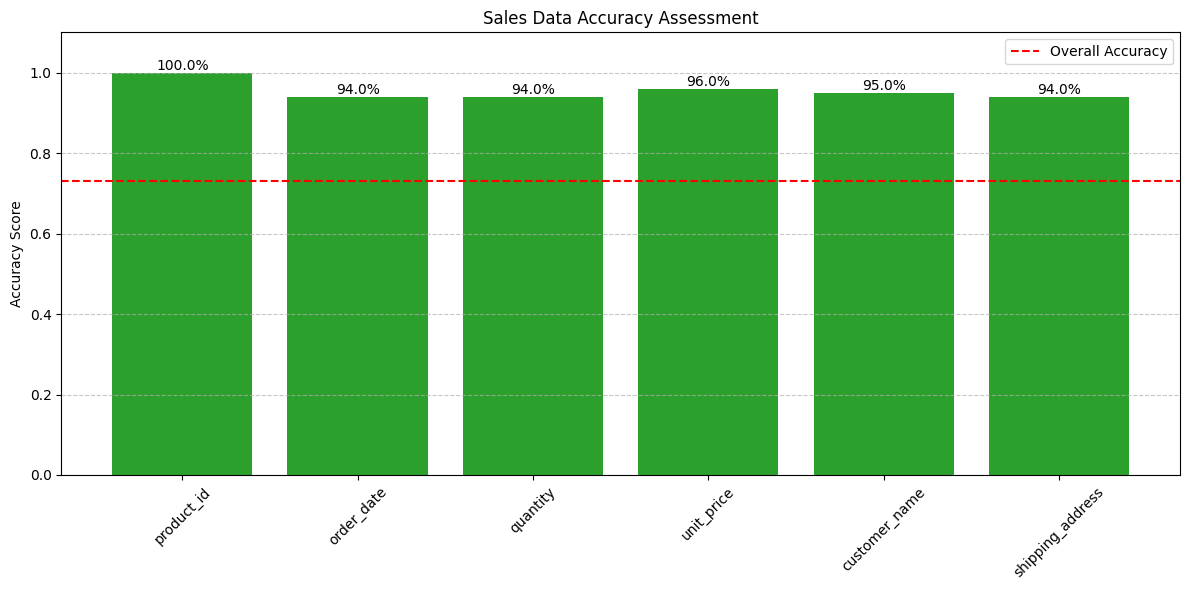


Sample Mismatches:

order_date mismatches:
    order_id  customer_id order_date order_date_reference
30      1031         5276 2023-02-02           2023-01-31
31      1032         5160 2023-02-03           2023-02-01

quantity mismatches:
    order_id  customer_id  quantity  quantity_reference
10      1011         5466         4                   2
11      1012         5214        11                   9

unit_price mismatches:
    order_id  customer_id  unit_price  unit_price_reference
20      1021         5661      26.917                 24.47
21      1022         5308      65.329                 59.39

customer_name mismatches:
    order_id  customer_id customer_name customer_name_reference
40      1041         5058     Jon Smith              John Smith
41      1042         5510        J. Doe           Michael Brown

shipping_address mismatches:
    order_id  customer_id shipping_address shipping_address_reference
50      1051         5957          Main St                794 Main St

In [ ]:

import pandas as pd
import numpy as np
from datetime import datetime
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

def calculate_accuracy(main_df, reference_df, key_columns, match_columns, fuzzy_match_threshold=85):
    """
    Calculate accuracy scores by comparing main dataset to reference dataset
    
    Args:
        main_df: Primary dataset to evaluate
        reference_df: Ground truth reference dataset
        key_columns: List of columns used to match records between datasets
        match_columns: Dictionary of columns to compare {column_name: (tolerance, comparison_type)}
            comparison_type: 'exact', 'numeric', 'date', 'fuzzy'
        fuzzy_match_threshold: Minimum fuzzy match score (0-100)
    
    Returns:
        Dictionary containing accuracy scores and detailed results
    """
    merged = pd.merge(main_df, reference_df, 
                     on=key_columns, 
                     how='left',
                     suffixes=('', '_reference'))
    accuracy_results = {
        'column_scores': {},
        'record_scores': [],
        'overall_accuracy': None
    }
    for col, (tolerance, comp_type) in match_columns.items():
        ref_col = f"{col}_reference"
        if comp_type == 'exact':
            matches = (merged[col] == merged[ref_col])
        elif comp_type == 'numeric':
            matches = (abs(merged[col] - merged[ref_col]) <= tolerance)
        elif comp_type == 'date':
            date_diff = (merged[col] - merged[ref_col]).abs()
            matches = (date_diff <= pd.Timedelta(days=tolerance))
        elif comp_type == 'fuzzy':
            matches = merged.apply(lambda x: fuzz.ratio(str(x[col]), str(x[ref_col])) >= fuzzy_match_threshold, axis=1)
        else:
            raise ValueError(f"Unknown comparison type: {comp_type}")
        accuracy = matches.mean()
        accuracy_results['column_scores'][col] = {
            'accuracy': accuracy,
            'mismatches': len(matches) - matches.sum(),
            'comparison_type': comp_type,
            'tolerance': tolerance
        }
        accuracy_results['record_scores'].append(matches.astype(int))
    if accuracy_results['record_scores']:
        all_matches = pd.concat(accuracy_results['record_scores'], axis=1).all(axis=1)
        accuracy_results['overall_accuracy'] = all_matches.mean()
    return accuracy_results
def visualize_accuracy(results, title="Data Accuracy Assessment"):
    """Visualize accuracy scores"""
    if not results['column_scores']:
        print("No accuracy metrics to visualize")
        return
    cols = list(results['column_scores'].keys())
    accuracies = [results['column_scores'][col]['accuracy'] for col in cols]
    plt.figure(figsize=(12, 6))
    bars = plt.bar(cols, accuracies, color='#2ca02c')
    plt.axhline(y=results['overall_accuracy'], color='r', linestyle='--', label='Overall Accuracy')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}',
                ha='center', va='bottom')
    plt.ylim(0, 1.1)
    plt.title(title)
    plt.ylabel('Accuracy Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
def generate_accuracy_report(results):
    """Generate detailed accuracy report"""
    report = []
    report.append(f"\n{'='*50}")
    report.append("DATA ACCURACY REPORT")
    report.append(f"{'='*50}\n")
    report.append(f"Overall Accuracy: {results['overall_accuracy']:.1%}\n")
    report.append("Column-Level Accuracy:")
    for col, metrics in results['column_scores'].items():
        report.append(
            f"- {col}: {metrics['accuracy']:.1%} "
            f"(Type: {metrics['comparison_type']}, "
            f"Tolerance: {metrics['tolerance']}, "
            f"Mismatches: {metrics['mismatches']})"
        )
    return "\n".join(report)
np.random.seed(42)
reference_data = pd.DataFrame({
    'order_id': range(1001, 1101),
    'customer_id': np.random.randint(5000, 6000, 100),
    'product_id': np.random.choice(['P100', 'P200', 'P300', 'P400'], 100),
    'order_date': pd.date_range('2023-01-01', periods=100),
    'quantity': np.random.randint(1, 10, 100),
    'unit_price': np.round(np.random.uniform(10, 100, 100), 2),
    'customer_name': np.random.choice(['John Smith', 'Jane Doe', 'Robert Johnson', 
                                      'Emily Davis', 'Michael Brown'], 100),
    'shipping_address': [f"{num} Main St" for num in np.random.randint(100, 999, 100)]
})
main_data = reference_data.copy()
main_data.loc[10:15, 'quantity'] += 2  
main_data.loc[20:25, 'unit_price'] *= 1.1  
main_data.loc[30:35, 'order_date'] += pd.Timedelta(days=2) 
main_data.loc[40:45, 'customer_name'] = ['Jon Smith', 'J. Doe', 'R. Johnson', 
                                        'E. Davis', 'Mike Brown', 'J. Smith']
main_data.loc[50:55, 'shipping_address'] = ['Main St', '100 Main Street', 
                                          '200 main st', '300 MAIN ST', 
                                          '400 Main St.', '500 mian st']
key_columns = ['order_id', 'customer_id']
match_columns = {
    'product_id': (0, 'exact'),
    'order_date': (1, 'date'), 
    'quantity': (1, 'numeric'),  
    'unit_price': (5, 'numeric'),  
    'customer_name': (0, 'fuzzy'), 
    'shipping_address': (0, 'fuzzy') 
}
accuracy_results = calculate_accuracy(main_data, reference_data, 
                                    key_columns, match_columns)
print(generate_accuracy_report(accuracy_results))
visualize_accuracy(accuracy_results, "Sales Data Accuracy Assessment")
merged = pd.merge(main_data, reference_data, 
                 on=key_columns, 
                 suffixes=('', '_reference'))
print("\nSample Mismatches:")
for col in match_columns:
    mismatches = merged[merged[col] != merged[f"{col}_reference"]].head(2)
    if not mismatches.empty:
        print(f"\n{col} mismatches:")
        print(mismatches[[*key_columns, col, f"{col}_reference"]])


### Task 3: Consistency Score

1. Objective: Evaluate the consistency within a dataset for specific columns.
2. Steps:
    - Choose a column expected to have consistent values.
    - Use statistical or rule-based checks to identify inconsistencies.
    - Calculate the consistency score by the ratio of consistent to total entries.
    - E.g., validating phone number formats in a contact list.

In [5]:
# Write your code from here
#
import pandas as pd
import re
def calculate_consistency_score(df, column_name, pattern=None):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    if pattern:
        consistent_count = df[column_name].astype(str).str.match(pattern).sum()
    else:
        consistent_count = df[column_name].astype(bool).sum()
    total_count = len(df)
    if total_count == 0:
        return 0.0
    consistency_score = consistent_count / total_count
    return consistency_score
if __name__ == '__main__':
    data = {'ID': [1, 2, 3, 4, 5],
            'Phone': ['123-456-7890', '9876543210', '555-123-4567', '111222333', '']}
    df = pd.DataFrame(data)
    phone_number_pattern = r'^\d{3}-\d{3}-\d{4}$'
    phone_consistency_score = calculate_consistency_score(df, 'Phone', pattern=phone_number_pattern)
    print(f"Phone number consistency score: {phone_consistency_score:.2f}")
    data_no_pattern = {'ID': [1, 2, 3, 4, 5],
                       'Country': ['USA', 'Canada', 'USA', 'UK', 'USA']}
    df_no_pattern = pd.DataFrame(data_no_pattern)
    country_consistency_score = calculate_consistency_score(df_no_pattern, 'Country')
    print(f"Country non-empty consistency score: {country_consistency_score:.2f}")



Phone number consistency score: 0.40
Country non-empty consistency score: 1.00
